In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset


data = pd.read_csv('iris_dataset.csv',index_col = 0)
X = data[['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']].values
y = data['Species'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)
print('training samples: {}, test samples: {}'.format(len(train_dataset), len(test_dataset)))

training samples: 120, test samples: 30


In [2]:
class IrisModel(nn.Module):
    def __init__(self):
        super(IrisModel, self).__init__()
        self.fc1 = nn.Linear(4, 16)
        self.fc2 = nn.Linear(16, 3)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x


torch.manual_seed(6)
model = IrisModel()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 20
losses = []
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    losses_epoch = []
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        losses_epoch.append(loss.detach().numpy())
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    loss_epoch = np.stack(losses_epoch).mean()
    print('epoch {}, loss={:.4f}'.format(epoch + 1, loss_epoch))
    losses.append(loss_epoch)

epoch 1, loss=0.9226
epoch 2, loss=0.8934
epoch 3, loss=0.8740
epoch 4, loss=0.8569
epoch 5, loss=0.8413
epoch 6, loss=0.8193
epoch 7, loss=0.8070
epoch 8, loss=0.7904
epoch 9, loss=0.7766
epoch 10, loss=0.7553
epoch 11, loss=0.7436
epoch 12, loss=0.7240
epoch 13, loss=0.7105
epoch 14, loss=0.6956
epoch 15, loss=0.6836
epoch 16, loss=0.6625
epoch 17, loss=0.6517
epoch 18, loss=0.6333
epoch 19, loss=0.6227
epoch 20, loss=0.6091


C:\ProgramData\Anaconda3\envs\ai4engineeringcourse\lib\site-packages\torch\autograd\__init__.py:251: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 11010). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at C:\cb\pytorch_1000000000000\work\c10\cuda\CUDAFunctions.cpp:108.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


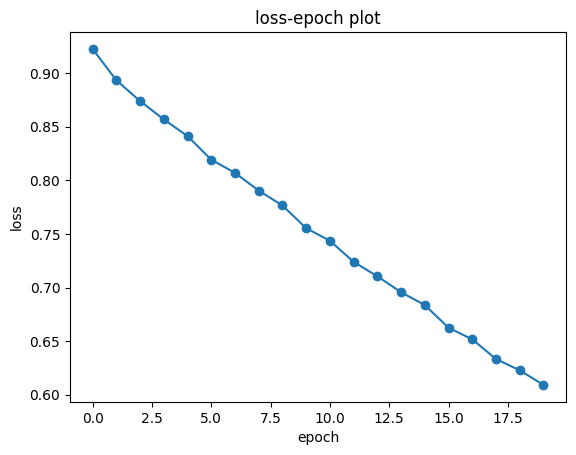

In [3]:
x = list(range(len(losses)))
plt.plot(x, losses, marker='o')
plt.title('loss-epoch plot')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [4]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(f'Accuracy on the test set: {100 * correct / total:.2f}%')

Accuracy on the test set: 80.00%
